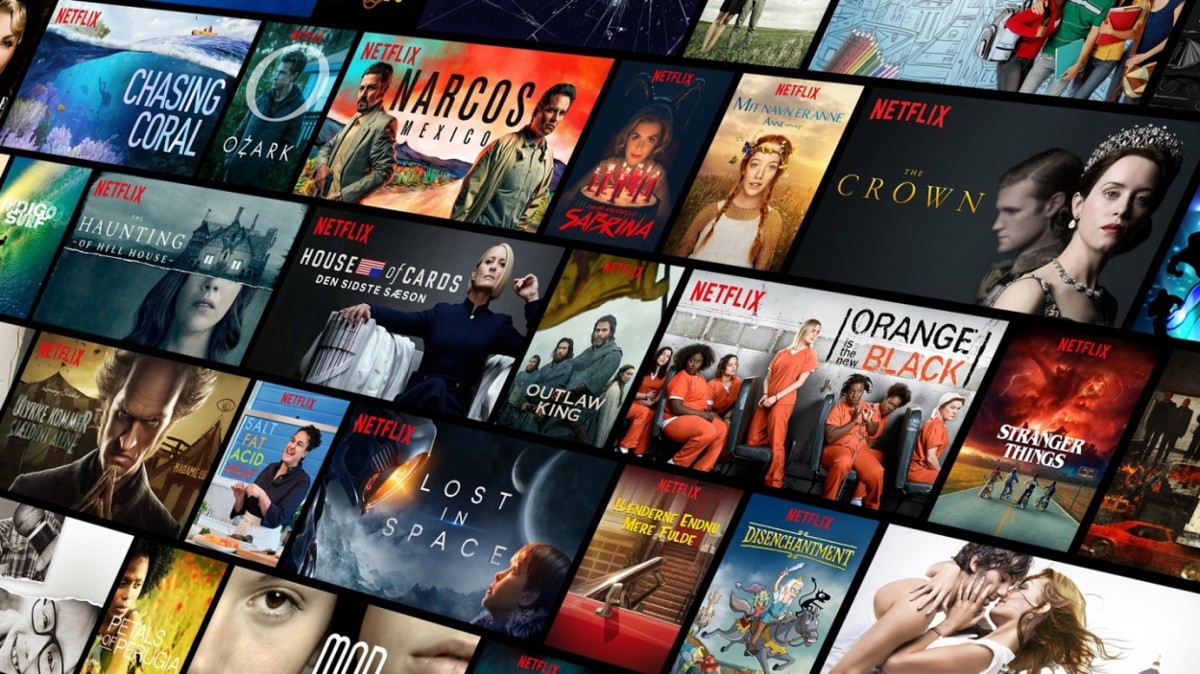

# <center>EDSA MOVIE RECOMMENDATION 2022</center>

A recommender system is a subclass of information filtering system that seeks to predict the “rating” or “preference” a user would give to an item. They are primarily used in commercial applications. Examples of such applications include recommending products on Amazon, music on Spotify, and of course, stories on Medium.


#                **Types of Recommender Systems**

---


Recommender systems are typically classified into the following categories:

- Content-based filtering
- Collaborative filtering
- Hybrid systems

Depending on whether a model is learned from the underlying data, recommender systems can also be divided into:

- Memory-based

- Model-base

The algorithm in this notebook carries out its prediction based on similar content, or what is known as a content-based recommendation system and similar users also known as collaborative-based recommendation system.  

Given a movie that a user has not rated, the algorithm seeks to predict the rating based on the ratings given by the user on past movies. 

# Data Overview 

This dataset consists of several million 5-star ratings obtained from users of the online MovieLens movie recommendation service. 

For this Predict, we used a special version of the MovieLens dataset which has enriched with additional data, and resampled for fair evaluation purposes.

The data for the MovieLens dataset is maintained by the GroupLens research group in the Department of Computer Science and Engineering at the University of Minnesota. Additional movie content data was legally scraped from IMDB

Supplied Files
- genome_scores.csv - a score mapping the strength between movies and tag-related properties. Read more here
- genome_tags.csv - user assigned tags for genome-related scores
- imdb_data.csv - Additional movie metadata scraped from IMDB using the links.csv file.
- links.csv - File providing a mapping between a MovieLens ID and associated IMDB and TMDB IDs.
- sample_submission.csv - Sample of the submission format for the hackathon.
- tags.csv - User assigned for the movies within the dataset.
- test.csv - The test split of the dataset. Contains user and movie IDs with no rating data.
- train.csv - The training split of the dataset. Contains user and movie IDs with associated rating data.

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Libraries</a>

<a href=#two>2. Loading the Datasets</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Modeling and Prediction</a>

<a href=#five>5. Kaggle Submission</a>

<a href=#six>6. Model Pickling</a>

<a href=#seven>7. Model Explanations</a>

<a href=#eight>8. Conclusion</a>

<a href=#nine>9. Comet</a>

<a href=#ten>10. References</a>


<a id="one"></a>
# 1. Importing Libraries 
<a href=#cont>Back to Table of Contents</a>

The first step was to import neccesary libraries required for the project. More libraries were added to this section for importation as the project progressed. This section contains all the packages that were imported during the course of building our model and making predictions with it.

In [77]:
#Run this code to install surprise and commet for storage if you haven't
!pip install surprise
!pip install comet_ml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [78]:
# Importing the libraries we'll use 
import numpy as np
from numpy.linalg import norm
import pandas as pd

# Libraries for data preparation
import re
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import scipy as sp # <-- The sister of Numpy, used in our code for numerical efficientcy. 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import operator # <-- Convienient item retrieval during iteration 
import heapq # <-- Efficient sorting of large lists
from datetime import datetime

# Libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')
%matplotlib inline
from wordcloud import WordCloud

# libraries for data modeling 
from surprise.model_selection import GridSearchCV, cross_validate, train_test_split
from surprise import (KNNBasic, Dataset,Reader,SVD,SVDpp, SlopeOne, NMF, 
                      NormalPredictor, KNNBaseline, KNNBasic, KNNWithMeans,
                      KNNWithZScore, BaselineOnly, CoClustering)

# Entity featurization and similarity computation
from sklearn.metrics.pairwise import cosine_similarity 
from sklearn.feature_extraction.text import TfidfVectorizer
from surprise import accuracy, Dataset, SVD

# libraries for data storage
import pickle
from zipfile import ZipFile
# Libraries used during sorting procedures.

# Imported for our sanity
import warnings
warnings.filterwarnings('ignore')

# Importing comet_ml
from comet_ml import Experiment

#For reproducibility
Random_state= 42



<a id="two"></a>
# 2. Load the datasets
<a href=#cont>Back to Table of Contents</a>

After importing necessary libraries, we read in all the decessary datasets required to build the model and make predictions. The datasets were sourced from a google drive and imported into Google Colabs.

In [79]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [80]:
#with ZipFile('/content/drive/MyDrive/Copy of b.zip', 'r') as zipObj:
 # zipObj.extractall('/content/drive/MyDrive/')

In [81]:
movies_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/movies.csv')
tags_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/tags.csv')
imdb_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/imdb_data.csv')
movie_ratings = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train.csv')
test= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/test.csv')
genomes_tags= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/genome_tags.csv')
genomes_score= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/genome_scores.csv')
links= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/links.csv')
submission= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sample_submission.csv')

In [82]:
#movies_df = pd.read_csv('movies.csv')
movies_ratings= movie_ratings.copy() 

<a id="three"></a>
# 3. Exploratory Data Analysis (EDA) & Feature Engineering
<a href=#cont>Back to Table of Contents</a>

After loading the data, the next thing we need was to perform an exploratory data analysis around on our data. This hepled us  understand our data without making any assumptions. it provided context and guidance on the course of action we took as we built our model. We performed both non-graphical and graphical EDA on our data.


We started our EDA by conducting a basic analysis on our data using the following methods;

    - df.head()
    - df.shape
    - df.info()
    - df.isnull()
    
Then we went further to do some graphical EDAs.
    
For the feature engineering part of this section, we did the following;

    - Filled null values
    - Merged datasets
    - Dropped some columns
    - Cleaned the data
    - Converted the final dataframe to numbers using TF-IDF vectorizer


In [2]:
# View first five rows of the movies_df dataframe
movies_df.head()

NameError: name 'movies_df' is not defined

As we can see, the genres properties is separated by | character. we would have to remove the character and clean the dataset in order to make it useful for us.  

In [84]:
# cleaning up the movie genre by removing unwanted characters
movies_df['genres'] = movies_df['genres'].str.split('|').str.join(',')

In [85]:
# Quick view of the first movies_df column
movies_df.head(1)

,movieId,title,genres
0,1,Toy Story (1995),"Adventure,Animation,Children,Comedy,Fantasy"


### The tags data
We'll now take a look at the tags data

In [86]:
#tags_df = pd.read_csv('tags.csv')

In [87]:
tags_df.head()

,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455


From the above, we see that one user can tag a single movie more than once. We'll now examine if several users can tag the same movie

In [88]:
# searching for user tags for movie id == 1
tags_df[tags_df['movieId'] == 1]

,userId,movieId,tag,timestamp
2306,791,1,Owned,1515175493
3749,1048,1,imdb top 250,1172144394
4226,1361,1,Pixar,1216146311
10003,3164,1,Pixar,1223304727
10004,3164,1,time travel,1223304729
...,...,...,...,...
1084685,160835,1,American Animation,1437092829
1084688,160858,1,computer animation,1451035426
1084689,160858,1,pixar,1451035426
1088052,161172,1,Pixar,1159534063


From the above, we can also see that several users can tag the same movie. 

#### So we needed a way to collect all the tags for each movie and put them in the movies_df dataframe. We also needed to make sure that each tag is unique. 

In [89]:
def create_movie_tags(x):
    """
    parameters:
    x : a number. We expect a movieId
    -----------------------
    output:
    mystring: a string. usually concatenated series of strings separated by a comma.

    """
    # get the tags list
    tags_series = tags_df[tags_df['movieId'] == x]['tag']
    # convert the series to a list
    tags_list = tags_series.tolist()
    total = []
    for letter in tags_list:
        letter = str(letter)
        intermediate = letter.split()
        total = total + intermediate
    # remove duplicates in the list of strings    
    total = list(set(total))
    # convert the unique list of strings into a concatenated string    
    mystring = ",".join(total)
    return mystring    




In [90]:
movies_df['tags'] = movies_df['movieId'].apply(create_movie_tags)

In [91]:
movies_df.head()

,movieId,title,genres,tags
0,1,Toy Story (1995),"Adventure,Animation,Children,Comedy,Fantasy","unny,film,Tim,fantasy,buddy,touching,animation..."
1,2,Jumanji (1995),"Adventure,Children,Fantasy","Van,Williams,kid,Adaptation,jungle,For,Kirsten..."
2,3,Grumpier Old Men (1995),"Comedy,Romance","engraÃƒÂ§ada,moldy,Lemmon,running,engraÃ§ada,H..."
3,4,Waiting to Exhale (1995),"Comedy,Drama,Romance","single,or,relationship,mother,CLV,novel,on,fli..."
4,5,Father of the Bride Part II (1995),Comedy,"Diane,parent,Martin,confidence,Fantasy,crisis,..."


### IMBD data



Imdb means the Internet Movie database. it is an onliine database with information and statistics about movies. This database contains interesting properties of movies such as title cast, director, runtime, budget and plot keywords. 

In [92]:
# importing the imdb database
#imdb_df = pd.read_csv('imdb_data.csv')

In [93]:
# taking a look at the database. The first five rows
imdb_df.head()

,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,124.0,"$16,000,000",black american|husband wife relationship|betra...
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion


The properties of interest from the imdb database are title_cast, director, runtime, plot_keywords. We left out the budget property for now. 

In [94]:
# removing the | character from title_cast column
imdb_df['title_cast'] = imdb_df['title_cast'].str.split('|').str.join(', ')

In [95]:
imdb_df.head()

,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,"Tom Hanks, Tim Allen, Don Rickles, Jim Varney,...",John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,"Robin Williams, Jonathan Hyde, Kirsten Dunst, ...",Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game
2,3,"Walter Matthau, Jack Lemmon, Sophia Loren, Ann...",Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry
3,4,"Whitney Houston, Angela Bassett, Loretta Devin...",Terry McMillan,124.0,"$16,000,000",black american|husband wife relationship|betra...
4,5,"Steve Martin, Diane Keaton, Martin Short, Kimb...",Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion


#### Next, the title_cast was added to the movies dataframe

In [96]:
def add_title_cast(x):
    """
    This function adds a title to the movies dataframe

    parameters:
    x: a number. specifically, a movie id from the dataframe
    ---------------
    output:
    title_case: a concatenated string derived from the imdb title_cast column
    function could output an empty string if the movie id is not in the imdb dataset 
    """
    # create a series of the movieid column in imdb df
    title_series = imdb_df['movieId']
    # check if the movieId from the movies df is in the series
    if x in title_series.values:
        title_case = imdb_df.loc[imdb_df['movieId'] == x, 'title_cast'].item()
        return title_case
    else:
        return " "         

In [97]:
movies_df['title_cast'] = movies_df['movieId'].apply(add_title_cast)
movies_df.head()

,movieId,title,genres,tags,title_cast
0,1,Toy Story (1995),"Adventure,Animation,Children,Comedy,Fantasy","unny,film,Tim,fantasy,buddy,touching,animation...","Tom Hanks, Tim Allen, Don Rickles, Jim Varney,..."
1,2,Jumanji (1995),"Adventure,Children,Fantasy","Van,Williams,kid,Adaptation,jungle,For,Kirsten...","Robin Williams, Jonathan Hyde, Kirsten Dunst, ..."
2,3,Grumpier Old Men (1995),"Comedy,Romance","engraÃƒÂ§ada,moldy,Lemmon,running,engraÃ§ada,H...","Walter Matthau, Jack Lemmon, Sophia Loren, Ann..."
3,4,Waiting to Exhale (1995),"Comedy,Drama,Romance","single,or,relationship,mother,CLV,novel,on,fli...","Whitney Houston, Angela Bassett, Loretta Devin..."
4,5,Father of the Bride Part II (1995),Comedy,"Diane,parent,Martin,confidence,Fantasy,crisis,...","Steve Martin, Diane Keaton, Martin Short, Kimb..."


#### The director item was also added

In [98]:
def add_director(x):
    """
    Function adds a director name to the movie id dataset when called. 
    parameters:
    x : a number. Specifically, a movie id
    output:
    director: the director name taken from the imdb dataset. 
    Function could also output an empty string if the movie id, x, is not in the imdb dataset

    """
    # create a series of the movieid column in imdb df
    director_series = imdb_df['movieId']
    # check if the movieId from the movies df is in the series
    if x in director_series.values:
        director = imdb_df.loc[imdb_df['movieId'] == x, 'director'].item()
        return director
    else:
        return " "         

In [99]:
movies_df['director'] = movies_df['movieId'].apply(add_director)

In [100]:
movies_df.head()

,movieId,title,genres,tags,title_cast,director
0,1,Toy Story (1995),"Adventure,Animation,Children,Comedy,Fantasy","unny,film,Tim,fantasy,buddy,touching,animation...","Tom Hanks, Tim Allen, Don Rickles, Jim Varney,...",John Lasseter
1,2,Jumanji (1995),"Adventure,Children,Fantasy","Van,Williams,kid,Adaptation,jungle,For,Kirsten...","Robin Williams, Jonathan Hyde, Kirsten Dunst, ...",Jonathan Hensleigh
2,3,Grumpier Old Men (1995),"Comedy,Romance","engraÃƒÂ§ada,moldy,Lemmon,running,engraÃ§ada,H...","Walter Matthau, Jack Lemmon, Sophia Loren, Ann...",Mark Steven Johnson
3,4,Waiting to Exhale (1995),"Comedy,Drama,Romance","single,or,relationship,mother,CLV,novel,on,fli...","Whitney Houston, Angela Bassett, Loretta Devin...",Terry McMillan
4,5,Father of the Bride Part II (1995),Comedy,"Diane,parent,Martin,confidence,Fantasy,crisis,...","Steve Martin, Diane Keaton, Martin Short, Kimb...",Albert Hackett


#### Then the budget was added 

In [101]:
def add_budget(x):
    """
    Function adds a budget to the movie id dataset. 
    parameters:
    x: a number. Specifically, the movie id from a given row in movie id dataset
    output:
    budget: a string. The corresponding budget for the given movie id as contained in the imdb dataset
    Function could output an empty string if the movie id is not in the imdb dataset. 
    """
    # create a series of the movieid column in imdb df
    budget_series = imdb_df['movieId']
    # check if the movieId from the movies df is in the series
    if x in budget_series.values:
        budget = imdb_df.loc[imdb_df['movieId'] == x, 'budget'].item()
        return budget
    else:
        return " "         

In [102]:
movies_df['budget'] = movies_df['movieId'].apply(add_budget)

In [103]:
movies_df.head()

,movieId,title,genres,tags,title_cast,director,budget
0,1,Toy Story (1995),"Adventure,Animation,Children,Comedy,Fantasy","unny,film,Tim,fantasy,buddy,touching,animation...","Tom Hanks, Tim Allen, Don Rickles, Jim Varney,...",John Lasseter,"$30,000,000"
1,2,Jumanji (1995),"Adventure,Children,Fantasy","Van,Williams,kid,Adaptation,jungle,For,Kirsten...","Robin Williams, Jonathan Hyde, Kirsten Dunst, ...",Jonathan Hensleigh,"$65,000,000"
2,3,Grumpier Old Men (1995),"Comedy,Romance","engraÃƒÂ§ada,moldy,Lemmon,running,engraÃ§ada,H...","Walter Matthau, Jack Lemmon, Sophia Loren, Ann...",Mark Steven Johnson,"$25,000,000"
3,4,Waiting to Exhale (1995),"Comedy,Drama,Romance","single,or,relationship,mother,CLV,novel,on,fli...","Whitney Houston, Angela Bassett, Loretta Devin...",Terry McMillan,"$16,000,000"
4,5,Father of the Bride Part II (1995),Comedy,"Diane,parent,Martin,confidence,Fantasy,crisis,...","Steve Martin, Diane Keaton, Martin Short, Kimb...",Albert Hackett,"$30,000,000"


#### Before we added the plot keywords, we removed the pipe, |, character. 

In [104]:
# removing the | character from plot_keywords column
imdb_df['plot_keywords'] = imdb_df['plot_keywords'].str.split('|').str.join(',')
imdb_df.head()

,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,"Tom Hanks, Tim Allen, Don Rickles, Jim Varney,...",John Lasseter,81.0,"$30,000,000","toy,rivalry,cowboy,cgi animation"
1,2,"Robin Williams, Jonathan Hyde, Kirsten Dunst, ...",Jonathan Hensleigh,104.0,"$65,000,000","board game,adventurer,fight,game"
2,3,"Walter Matthau, Jack Lemmon, Sophia Loren, Ann...",Mark Steven Johnson,101.0,"$25,000,000","boat,lake,neighbor,rivalry"
3,4,"Whitney Houston, Angela Bassett, Loretta Devin...",Terry McMillan,124.0,"$16,000,000","black american,husband wife relationship,betra..."
4,5,"Steve Martin, Diane Keaton, Martin Short, Kimb...",Albert Hackett,106.0,"$30,000,000","fatherhood,doberman,dog,mansion"


#### Then the plot_keywords column was added to the movies dataframe

In [105]:
# creating a function to add plot keywords column
def add_plot_keywords(x):
    """
    function adds the plot_keywords column to the movie dataset
    parameters:
    x: a number. A given movie id from the movie dataset
    output:
    result: a string. The concatenated strings comprising the plot_keywords as used in the imdb dataset plot_keywords column
    function could output an empty string if the movie id, x, is not in the imdb dataset
    """
    # create a series of the movieid column in imdb df
    plot_series = imdb_df['movieId']
    # check if the movieId from the movies df is in the series
    if x in plot_series.values:
        plot = imdb_df.loc[imdb_df['movieId'] == x, 'plot_keywords'].item()
        plot = str(plot)
        mylist = plot.split(',')
        final_list = []
        for x in mylist:
            temp_x = x.split()
            final_list = final_list + temp_x
        final_list = list(set(final_list))
        result = ",".join(final_list)
        return result
    else:
        return " "         

In [106]:
add_plot_keywords(2)

'board,game,adventurer,fight'

In [107]:
movies_df['plot_keywords'] = movies_df['movieId'].apply(add_plot_keywords)
movies_df.head()

,movieId,title,genres,tags,title_cast,director,budget,plot_keywords
0,1,Toy Story (1995),"Adventure,Animation,Children,Comedy,Fantasy","unny,film,Tim,fantasy,buddy,touching,animation...","Tom Hanks, Tim Allen, Don Rickles, Jim Varney,...",John Lasseter,"$30,000,000","toy,cgi,rivalry,cowboy,animation"
1,2,Jumanji (1995),"Adventure,Children,Fantasy","Van,Williams,kid,Adaptation,jungle,For,Kirsten...","Robin Williams, Jonathan Hyde, Kirsten Dunst, ...",Jonathan Hensleigh,"$65,000,000","board,game,adventurer,fight"
2,3,Grumpier Old Men (1995),"Comedy,Romance","engraÃƒÂ§ada,moldy,Lemmon,running,engraÃ§ada,H...","Walter Matthau, Jack Lemmon, Sophia Loren, Ann...",Mark Steven Johnson,"$25,000,000","neighbor,boat,rivalry,lake"
3,4,Waiting to Exhale (1995),"Comedy,Drama,Romance","single,or,relationship,mother,CLV,novel,on,fli...","Whitney Houston, Angela Bassett, Loretta Devin...",Terry McMillan,"$16,000,000","husband,american,betrayal,son,wife,mother,blac..."
4,5,Father of the Bride Part II (1995),Comedy,"Diane,parent,Martin,confidence,Fantasy,crisis,...","Steve Martin, Diane Keaton, Martin Short, Kimb...",Albert Hackett,"$30,000,000","doberman,fatherhood,mansion,dog"


#### The runtime from the imdb dataframe was also added to the movies dataframe. 

In [108]:
def add_runtime(x):
    """
    function adds movie runtime to the movie dataset from the imdb dataseet
    parameters:
    x: a number. movie id from the movies dataset 
    output:
    runtime: a number. the runtime for the specific movie id derived from the imdb dataset
    function could output nan if the movie id does not exist in the imdb dataset. 
    """
    # create a series of the movieid column in imdb df
    runtime_series = imdb_df['movieId']
    # check if the movieId from the movies df is in the series
    if x in runtime_series.values:
        runtime = imdb_df.loc[imdb_df['movieId'] == x, 'runtime'].item()
        return runtime
    else:
        return np.nan         

In [109]:
movies_df['runtime'] = movies_df['movieId'].apply(add_runtime)
movies_df.head()

,movieId,title,genres,tags,title_cast,director,budget,plot_keywords,runtime
0,1,Toy Story (1995),"Adventure,Animation,Children,Comedy,Fantasy","unny,film,Tim,fantasy,buddy,touching,animation...","Tom Hanks, Tim Allen, Don Rickles, Jim Varney,...",John Lasseter,"$30,000,000","toy,cgi,rivalry,cowboy,animation",81.0
1,2,Jumanji (1995),"Adventure,Children,Fantasy","Van,Williams,kid,Adaptation,jungle,For,Kirsten...","Robin Williams, Jonathan Hyde, Kirsten Dunst, ...",Jonathan Hensleigh,"$65,000,000","board,game,adventurer,fight",104.0
2,3,Grumpier Old Men (1995),"Comedy,Romance","engraÃƒÂ§ada,moldy,Lemmon,running,engraÃ§ada,H...","Walter Matthau, Jack Lemmon, Sophia Loren, Ann...",Mark Steven Johnson,"$25,000,000","neighbor,boat,rivalry,lake",101.0
3,4,Waiting to Exhale (1995),"Comedy,Drama,Romance","single,or,relationship,mother,CLV,novel,on,fli...","Whitney Houston, Angela Bassett, Loretta Devin...",Terry McMillan,"$16,000,000","husband,american,betrayal,son,wife,mother,blac...",124.0
4,5,Father of the Bride Part II (1995),Comedy,"Diane,parent,Martin,confidence,Fantasy,crisis,...","Steve Martin, Diane Keaton, Martin Short, Kimb...",Albert Hackett,"$30,000,000","doberman,fatherhood,mansion,dog",106.0


#### A single column which is a concatenation of the textual columns was created

In [110]:
movies_df['properties'] = movies_df['genres'].astype(str) + ',' + movies_df['tags'].astype(str) + ',' + movies_df['title_cast'].astype(str) + ',' + movies_df['director'].astype(str) + ',' + movies_df['plot_keywords'].astype(str) 
movies_df.head()

,movieId,title,genres,tags,title_cast,director,budget,plot_keywords,runtime,properties
0,1,Toy Story (1995),"Adventure,Animation,Children,Comedy,Fantasy","unny,film,Tim,fantasy,buddy,touching,animation...","Tom Hanks, Tim Allen, Don Rickles, Jim Varney,...",John Lasseter,"$30,000,000","toy,cgi,rivalry,cowboy,animation",81.0,"Adventure,Animation,Children,Comedy,Fantasy,un..."
1,2,Jumanji (1995),"Adventure,Children,Fantasy","Van,Williams,kid,Adaptation,jungle,For,Kirsten...","Robin Williams, Jonathan Hyde, Kirsten Dunst, ...",Jonathan Hensleigh,"$65,000,000","board,game,adventurer,fight",104.0,"Adventure,Children,Fantasy,Van,Williams,kid,Ad..."
2,3,Grumpier Old Men (1995),"Comedy,Romance","engraÃƒÂ§ada,moldy,Lemmon,running,engraÃ§ada,H...","Walter Matthau, Jack Lemmon, Sophia Loren, Ann...",Mark Steven Johnson,"$25,000,000","neighbor,boat,rivalry,lake",101.0,"Comedy,Romance,engraÃƒÂ§ada,moldy,Lemmon,runni..."
3,4,Waiting to Exhale (1995),"Comedy,Drama,Romance","single,or,relationship,mother,CLV,novel,on,fli...","Whitney Houston, Angela Bassett, Loretta Devin...",Terry McMillan,"$16,000,000","husband,american,betrayal,son,wife,mother,blac...",124.0,"Comedy,Drama,Romance,single,or,relationship,mo..."
4,5,Father of the Bride Part II (1995),Comedy,"Diane,parent,Martin,confidence,Fantasy,crisis,...","Steve Martin, Diane Keaton, Martin Short, Kimb...",Albert Hackett,"$30,000,000","doberman,fatherhood,mansion,dog",106.0,"Comedy,Diane,parent,Martin,confidence,Fantasy,..."


#### Next, the properties column was cleaned 

In [111]:
# remove non-ascii characters 
movies_df['properties'] = movies_df['properties'].str.encode('ascii', 'ignore').str.decode('ascii')
# remove non alphabetic characters, including numerics
movies_df['properties'] = movies_df['properties'].str.replace(r'[_0-9:\(\)]+', '')
# remove trailing and middle-placed white space and commas. 
movies_df['properties'] = movies_df['properties'].str.replace('[\s,]*,[\s,]*', ',', regex=True)
# convert all the string to lower case
movies_df['properties'] = movies_df['properties'].str.lower()
movies_df

,movieId,title,genres,tags,title_cast,director,budget,plot_keywords,runtime,properties
0,1,Toy Story (1995),"Adventure,Animation,Children,Comedy,Fantasy","unny,film,Tim,fantasy,buddy,touching,animation...","Tom Hanks, Tim Allen, Don Rickles, Jim Varney,...",John Lasseter,"$30,000,000","toy,cgi,rivalry,cowboy,animation",81.0,"adventure,animation,children,comedy,fantasy,un..."
1,2,Jumanji (1995),"Adventure,Children,Fantasy","Van,Williams,kid,Adaptation,jungle,For,Kirsten...","Robin Williams, Jonathan Hyde, Kirsten Dunst, ...",Jonathan Hensleigh,"$65,000,000","board,game,adventurer,fight",104.0,"adventure,children,fantasy,van,williams,kid,ad..."
2,3,Grumpier Old Men (1995),"Comedy,Romance","engraÃƒÂ§ada,moldy,Lemmon,running,engraÃ§ada,H...","Walter Matthau, Jack Lemmon, Sophia Loren, Ann...",Mark Steven Johnson,"$25,000,000","neighbor,boat,rivalry,lake",101.0,"comedy,romance,engraada,moldy,lemmon,running,e..."
3,4,Waiting to Exhale (1995),"Comedy,Drama,Romance","single,or,relationship,mother,CLV,novel,on,fli...","Whitney Houston, Angela Bassett, Loretta Devin...",Terry McMillan,"$16,000,000","husband,american,betrayal,son,wife,mother,blac...",124.0,"comedy,drama,romance,single,or,relationship,mo..."
4,5,Father of the Bride Part II (1995),Comedy,"Diane,parent,Martin,confidence,Fantasy,crisis,...","Steve Martin, Diane Keaton, Martin Short, Kimb...",Albert Hackett,"$30,000,000","doberman,fatherhood,mansion,dog",106.0,"comedy,diane,parent,martin,confidence,fantasy,..."
...,...,...,...,...,...,...,...,...,...,...
62418,209157,We (2018),Drama,,,,,,NaN,"drama,"
62419,209159,Window of the Soul (2001),Documentary,,,,,,NaN,"documentary,"
62420,209163,Bad Poems (2018),"Comedy,Drama",,,,,,NaN,"comedy,drama,"
62421,209169,A Girl Thing (2001),(no genres listed),,,,,,NaN,"no genres listed,"


In [112]:
# remove duplicated words in each property. There are lots of duplicates
def remove_dup(x):
    """
    function removes duplicated words in x. 
    parameters:
    x: a string. A string made of unique and duplicated words
    output:
    result: a string. a string with unique words separated by comma
    """
    mylist = x.split(',')
    final_list = []
    for y in mylist:
        temp_y = y.split()
        final_list = final_list + temp_y
    final_list = list(set(final_list))
    result = ",".join(final_list)
    return result



In [113]:
movies_df['properties'] = movies_df['properties'].apply(remove_dup)
movies_df

,movieId,title,genres,tags,title_cast,director,budget,plot_keywords,runtime,properties
0,1,Toy Story (1995),"Adventure,Animation,Children,Comedy,Fantasy","unny,film,Tim,fantasy,buddy,touching,animation...","Tom Hanks, Tim Allen, Don Rickles, Jim Varney,...",John Lasseter,"$30,000,000","toy,cgi,rivalry,cowboy,animation",81.0,"unny,film,angel,jillette,vhs,fantasy,buddy,tou..."
1,2,Jumanji (1995),"Adventure,Children,Fantasy","Van,Williams,kid,Adaptation,jungle,For,Kirsten...","Robin Williams, Jonathan Hyde, Kirsten Dunst, ...",Jonathan Hensleigh,"$65,000,000","board,game,adventurer,fight",104.0,"thiedeke,cyrus,fantasy,brandon,not,time,bell,j..."
2,3,Grumpier Old Men (1995),"Comedy,Romance","engraÃƒÂ§ada,moldy,Lemmon,running,engraÃ§ada,H...","Walter Matthau, Jack Lemmon, Sophia Loren, Ann...",Mark Steven Johnson,"$25,000,000","neighbor,boat,rivalry,lake",101.0,"burgess,andelin,cheryl,kevin,moldy,evenson,how..."
3,4,Waiting to Exhale (1995),"Comedy,Drama,Romance","single,or,relationship,mother,CLV,novel,on,fli...","Whitney Houston, Angela Bassett, Loretta Devin...",Terry McMillan,"$16,000,000","husband,american,betrayal,son,wife,mother,blac...",124.0,"husband,houston,or,angela,d.,son,leon,based,gr..."
4,5,Father of the Bride Part II (1995),Comedy,"Diane,parent,Martin,confidence,Fantasy,crisis,...","Steve Martin, Diane Keaton, Martin Short, Kimb...",Albert Hackett,"$30,000,000","doberman,fatherhood,mansion,dog",106.0,"bd,peter,eugene,diane,parent,confidence,fantas..."
...,...,...,...,...,...,...,...,...,...,...
62418,209157,We (2018),Drama,,,,,,NaN,drama
62419,209159,Window of the Soul (2001),Documentary,,,,,,NaN,documentary
62420,209163,Bad Poems (2018),"Comedy,Drama",,,,,,NaN,"drama,comedy"
62421,209169,A Girl Thing (2001),(no genres listed),,,,,,NaN,"listed,genres,no"


#### Then focus was given to the two columns that have numeric values - budget and runtime. Let's see their data types

In [114]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movieId        62423 non-null  int64  
 1   title          62423 non-null  object 
 2   genres         62423 non-null  object 
 3   tags           62423 non-null  object 
 4   title_cast     52758 non-null  object 
 5   director       52904 non-null  object 
 6   budget         44840 non-null  object 
 7   plot_keywords  62423 non-null  object 
 8   runtime        13521 non-null  float64
 9   properties     62423 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 4.8+ MB


#### We saw that the datatype of budget was object (string). We needed to convert it to numeric. Also, budget and runtime had null values. We filled these nulls with 0. Also after examining the budget columm, there were some characters like GBP, $ etc that had to be removed. 

In [115]:
movies_df.head(1)

,movieId,title,genres,tags,title_cast,director,budget,plot_keywords,runtime,properties
0,1,Toy Story (1995),"Adventure,Animation,Children,Comedy,Fantasy","unny,film,Tim,fantasy,buddy,touching,animation...","Tom Hanks, Tim Allen, Don Rickles, Jim Varney,...",John Lasseter,"$30,000,000","toy,cgi,rivalry,cowboy,animation",81.0,"unny,film,angel,jillette,vhs,fantasy,buddy,tou..."


In [116]:
# fill runtime and budget nulls with 0
movies_df['runtime'] = movies_df['runtime'].fillna(0)
movies_df['budget'] = movies_df['budget'].fillna(0)
# remove all non-numeric characters
movies_df['budget'] = movies_df['budget'].str.replace('[^0-9]+', '')
# convert budget column to numeric column
movies_df['budget'] = movies_df['budget'].apply(pd.to_numeric)
movies_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movieId        62423 non-null  int64  
 1   title          62423 non-null  object 
 2   genres         62423 non-null  object 
 3   tags           62423 non-null  object 
 4   title_cast     52758 non-null  object 
 5   director       52904 non-null  object 
 6   budget         7283 non-null   float64
 7   plot_keywords  62423 non-null  object 
 8   runtime        62423 non-null  float64
 9   properties     62423 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 4.8+ MB


In [117]:
# how many movies do we have?
print("The number of movies in the movies database is:", movies_df.shape[0])

The number of movies in the movies database is: 62423


In [118]:
# we now create a convenient index to map between movie ids and the indices in the data frame. 
movie_idx = movies_df['movieId']
indices = pd.Series(movies_df.index, index=movies_df['movieId'])

### Movie Ratings
Let's explore the ratings database. The ratings will be used for predictions. 

In [119]:
# importing the ratings csv file
#movie_ratings = pd.read_csv('train.csv')
movie_ratings.head()

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


We'll remove the timestamps from the ratings and then add movie titles to the ratings dataframe.

In [120]:
movie_ratings.drop("timestamp", axis=1, inplace=True)
movie_ratings.head()

,userId,movieId,rating
0,5163,57669,4.0
1,106343,5,4.5
2,146790,5459,5.0
3,106362,32296,2.0
4,9041,366,3.0


In [121]:
 movie_ratings['movieId'].nunique()

48213

In [122]:
movies_df.movieId.nunique()


62423

In [123]:
movie_ratings['title'] = movie_ratings.merge(movies_df, on=['movieId'], how='left')['title']
movie_ratings.head()


,userId,movieId,rating,title
0,5163,57669,4.0,In Bruges (2008)
1,106343,5,4.5,Father of the Bride Part II (1995)
2,146790,5459,5.0,Men in Black II (a.k.a. MIIB) (a.k.a. MIB 2) (...
3,106362,32296,2.0,Miss Congeniality 2: Armed and Fabulous (2005)
4,9041,366,3.0,Wes Craven's New Nightmare (Nightmare on Elm S...


#### Performed an exploratory data analysis around the ratings. 

In [124]:
# how many ratings do we have?
print("The number of ratings are", movie_ratings.shape[0])

The number of ratings are 10000038


In [125]:
Number_of_user = movie_ratings["userId"].nunique() # Numbers of uniques users in the dataset 
Number_of_movies= movie_ratings["movieId"].nunique() # numbers of uniques movies in the dataset 
rating = pd.Series (movie_ratings["rating"].unique()) # range of rating used in the data set
print ("Numbers of uniques users in the dataset: " , Number_of_user, 
       '\nNumbers of uniques movies in the dataset: ', Number_of_movies,
       '\nRange of rating used in the data set: ', min(rating),"-", max(rating))

Numbers of uniques users in the dataset:  162541 
Numbers of uniques movies in the dataset:  48213 
Range of rating used in the data set:  0.5 - 5.0


This shows that there are 162541 unique users , 48213 unique rated movies in data set. movies were rated using a rate of o.5-5. 0.5 for worst movie and 5 for good movies  

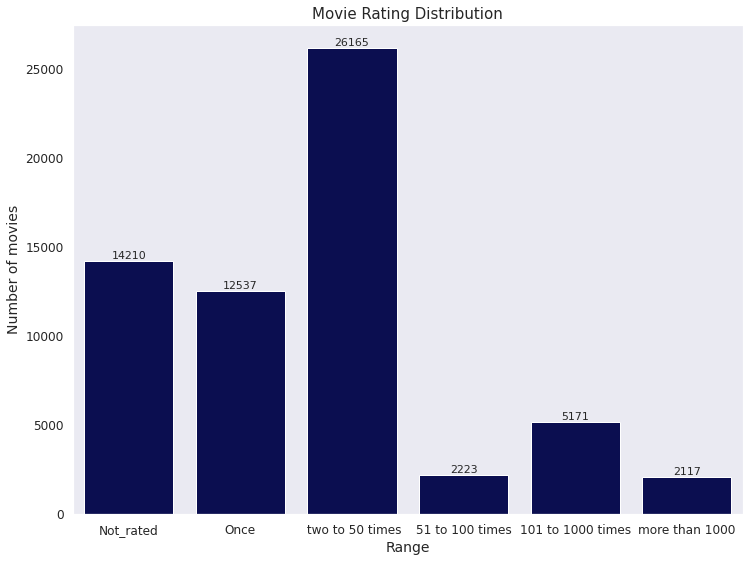

In [126]:
'''
At this section, movies where graded based on the number of times 
it was rated by users . 
Movies_R1: movies that were rated just once 
Movies_R50 : movies that was rated at the range of 2- 50 times 
Movies_ R100 : movies that was rated at the range of 51- 100 times   
Movies_ R100 : movies that was rated at the range of 101- 1000 times
Movies_ R1000_plus  : movies that was rated more than 1000 times 

this helps us understand how popular a movie is, and how people perceive the movie
'''
Not_Rated= []
All_movies= movies_df.movieId.unique()# list of all movies in the dataset
Movies_with_rating= movie_ratings['movieId'].unique() #list of movies with rating 
for movie in All_movies:
  if movie not in Movies_with_rating:
    Not_Rated.append(movie) # Appending list of movies that were not rated at all
Num_of_rate= movie_ratings["movieId"].value_counts().to_frame(name= "num").reset_index() # counting the number of times a movie was rated 
num_of_rate= Num_of_rate.rename(columns={"index":"movieId"})
movies_R1=num_of_rate[num_of_rate["num"]==1]# Movies rated just once 
movies_R50=num_of_rate[(num_of_rate["num"]> 1) & (num_of_rate["num"]<=50)] #movies Rated more than once but less than or equal to 50
movies_R100=num_of_rate[(num_of_rate["num"]>50 ) & (num_of_rate["num"]<=100)] #movies rated more 50 but less than or equal to 100
movies_R1000=num_of_rate[(num_of_rate["num"]> 100) & (num_of_rate["num"]<=1000)] #movies rated more 100 but less than or equal to 1000
movies_R1000_plus =num_of_rate[num_of_rate["num"]>1000] #movies rated more 1000
data = [len(Not_Rated), len(movies_R1), len(movies_R50), len(movies_R100), len(movies_R1000), len(movies_R1000_plus)]
labels = ['Not_rated', 'Once', ' two to 50 times', '51 to 100 times', '101 to 1000 times', 'more than 1000']
explode = [0.02,0.02,0.02,0.02,0.02, 0.02]
plt.figure(figsize=(12,9))
ax=sns.barplot(x= labels,y=data,color= "#00035b")
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), fontsize=11, ha='center', va='bottom')
plt.title("Movie Rating Distribution", fontsize= 15)
plt.xlabel("Range", fontsize= 14)
plt.ylabel('Number of movies' ,fontsize= 14)
plt.show()

Remember , the Movies data set contains 62423 unique movies . The analysis above shows that 14210 (23%) of the movies were not rated , 12537 (20%) was rated just once , 26165 (42%) was rated between 2 to 50 times , 2223 (4%) movies was rated 51 to 100 times , 5171 (8%) was rated 101 to 1000 times and 2117 (4%) movies was rated more than 1000 times. Therefore a large chunk of movies was not rated at all by the users.This would cause some problem for our collaborative based recommendation system 

## How users rated movies

 There was a need to inspect how wsers rated movies.  what was the most likely rating given to a movie?

Average rating in dataset: 3.5333951730983424


<Figure size 1008x576 with 0 Axes>

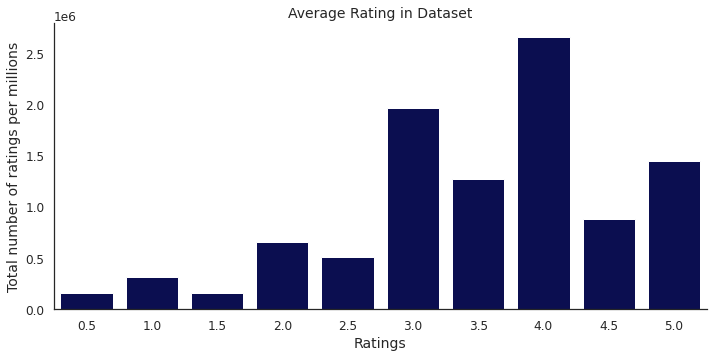

In [127]:
with sns.axes_style('white'):
    plt.figure(figsize= (14,8))
    g = sns.factorplot("rating", data=movie_ratings, aspect=2.0,kind='count', color= "#00035b")
    plt.title('Average Rating in Dataset', fontsize=14)
    g.set_xlabels("Ratings", fontsize= 14)
    g.set_ylabels("Total number of ratings per millions", fontsize= 14)
print (f'Average rating in dataset: {np.mean(movie_ratings["rating"])}')
plt.show()

From the above statistic and graphic, we can see that high percentage movie viewers tend to rate movies high. The mean average rating for all the movies is 3.5 while the modal rating(most frequently occuring) rating is 4.0.

###  Number of times An individual user rated a movie

#### Checked the top 10 users who rated movies the most, top 10 movies with the highest number of rate and last 10 movies with the lowest amount of rates

In [128]:
Top_10_User= movie_ratings["userId"].value_counts()[0:10]
UserId= Top_10_User.index.tolist()
Num_of_rating= Top_10_User.values.tolist()

Text(0, 0.5, 'Number of Ratings')

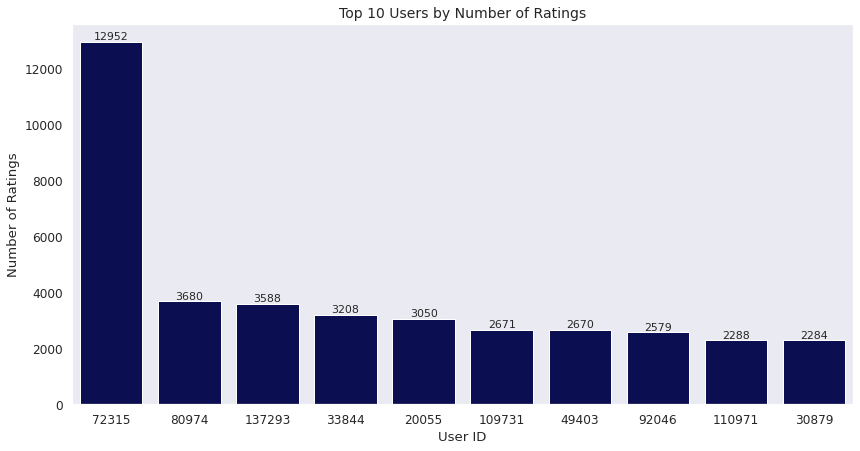

In [129]:
plt.figure (figsize= (14,7))
ax=sns.barplot(UserId, Num_of_rating, order= UserId, color= "#00035b")
for p in ax.patches:
        ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), fontsize=11, ha='center', va='bottom')
plt.title('Top 10 Users by Number of Ratings', fontsize=14)
plt.xlabel('User ID')
plt.ylabel('Number of Ratings')

This shows the top 10 users who rated movies the most and the number of times the user rated a movie. from the analysis above , User Id 72315, 80974 and 137293 are the top three users who rated movies the most.
it can also be seen that user Id 72315 shows patterns of been an outlier due to the large amount of difference between its records and that of other user. This needs to be investigated 

In [130]:
movie_ratings[movie_ratings['userId']== 72315].describe() #Checking if userID 72315 is an outlier

,userId,movieId,rating
count,12952.0,12952.000000,12952.000000
mean,72315.0,104552.179972,3.092380
std,0.0,67206.133146,0.747772
min,72315.0,2.000000,0.500000
25%,72315.0,41572.000000,2.500000
50%,72315.0,115766.500000,3.000000
75%,72315.0,164357.250000,3.500000
max,72315.0,207039.000000,5.000000


From the statistic above, it shows that user 72315 as rated movies 12952 times with the average rating of 3.092 and standard deviation of 0.7478 . Thus it is clear that UserId 72315 is not an outlier but a movie maniac who loves to watch and rate movies alot.

In [131]:
# Create a new dataframe from the train_movies dataframe to get the average rating  
movie_ratings2 = movie_ratings.copy()
Top_movie= movie_ratings2.movieId.value_counts()[0:10] # Getting value count for top 10 rated movies 
movie_Id= Top_movie.index.tolist() #
Num_of_rating= Top_movie.values.tolist()

movie_name=[]
for movie in movie_Id:
  movie_n= movie_ratings[movie_ratings["movieId"]== movie]["title"].unique()[0]
  movie_name.append(movie_n)

# Create a new dataframe from the train_movies dataframe to get the average rating  
Bad_movie= movie_ratings2.movieId.value_counts()[-10:-1]
Bad_movie_Id= Bad_movie.index.tolist()
Num_of_rating_B= Bad_movie.values.tolist()
Bad_movie_name=[]
for movie in Bad_movie_Id:
  movie_n= movie_ratings[movie_ratings["movieId"]== movie]["title"].unique()[0]
  Bad_movie_name.append(movie_n)

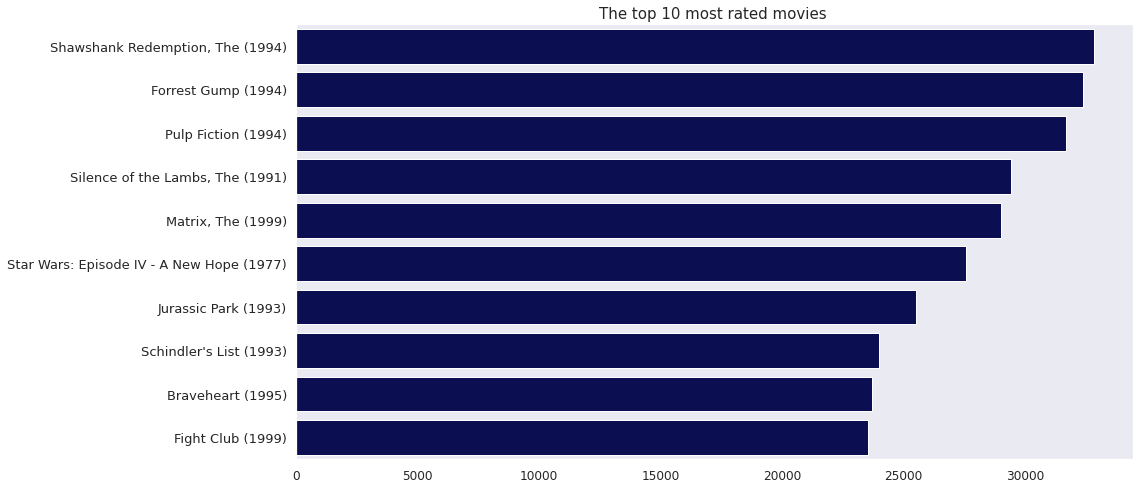

In [132]:
fig, ax  = plt.subplots(figsize=(15,8)) # Initialize a figure 

sns.barplot(ax=ax, x=Num_of_rating,y =movie_name, color= "#00035b") # Create a bar plot of the top 10 movies
ax.set_title('The top 10 most rated movies ', fontsize= 15) # Set title of the bar plot

ax.set_yticklabels(ax.get_yticklabels(), fontsize= 13)
plt.show() # show the plots 


The visual on shows the top 10 most rated movies, with shawshank redemption as the most rated movie followed by forest gump. Although this most a the most rated, this does not neccessarily means they are the best movies. 

### User ratings based on its genre

In [133]:
movies_df.head(1)

,movieId,title,genres,tags,title_cast,director,budget,plot_keywords,runtime,properties
0,1,Toy Story (1995),"Adventure,Animation,Children,Comedy,Fantasy","unny,film,Tim,fantasy,buddy,touching,animation...","Tom Hanks, Tim Allen, Don Rickles, Jim Varney,...",John Lasseter,30000000.0,"toy,cgi,rivalry,cowboy,animation",81.0,"unny,film,angel,jillette,vhs,fantasy,buddy,tou..."


In [134]:
New= [] # empty list to append the movie Id and each genres of the movies 
movie_genre= movies_df[["movieId", 'title', "genres"]] # creating a data frame out of movies_df
 # seperating the genre of each movies by comma and adding it to a seperate segment together with its movie Id
movie_genre["genres"]=movie_genre.genres.apply(lambda x: x.split(','))
for index,row in movie_genre.iterrows():
  for genre in row.genres:
    New.append([getattr(row, "movieId"), genre])

#Creating a dataframe using the New list
Movie_genres= pd.DataFrame(New, columns= ["movieId", "genres"])

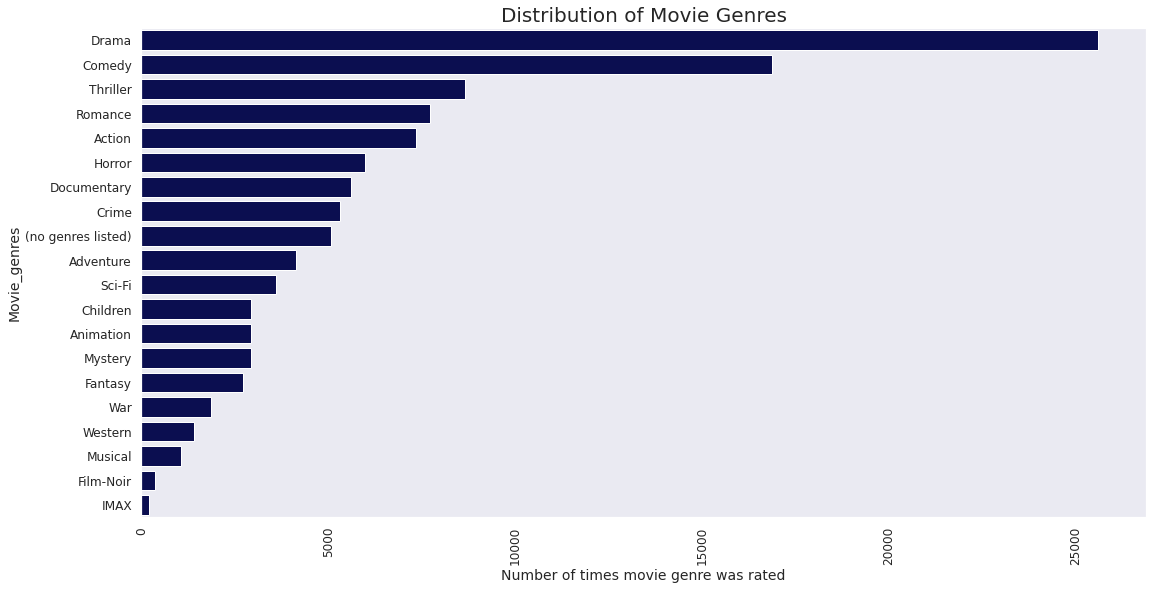

In [135]:
fig, ax = plt.subplots(figsize=(18, 9))# creating Subplot for visuals and indicating the size
sns.set(font_scale=1.1) # scales of the font
sns.countplot(y='genres' ,data=Movie_genres, order= Movie_genres['genres'].value_counts().index, color= "#00035b") #Genrating visual using count plot 
plt.xticks(rotation=90)
plt.xlabel('Number of times movie genre was rated', fontsize=14)
plt.ylabel('Movie_genres', size=14)
plt.title('Distribution of Movie Genres', size=20)
plt.show()

From the visual above , This shows that users tend to rate Movie that are purely drama in nature, followed by comedy while they least rate movies with Imax genres. Therefore there is an high chance that a user would like a movie which is pure drama drama compared to musical movies.

### Movie production per year and how people rate movies per year

To better understand the dataset, We need to know how many movies were produced per year , and How people rate those movies 

In [136]:
All_movie= movies_df[["movieId","title","tags"]] # creating a data frame that contains all movies produced and its title
All_movie["year"]=movies_df['title'].str[-5:-1] # extracting the year 
Movies_prod = All_movie['year'].value_counts()[0:75].sort_index().to_frame().reset_index() # counting numbers of movies that was produced per year and sorting it in descending order.
Movies_prod= Movies_prod.rename(columns= {'index': "year", 'year': "movies_prod"}) # renaming the columns 

In [137]:
# Quick view of movies produced per year
Movies_prod

,year,movies_prod
0,1937,234
1,1942,257
2,1947,232
3,1948,244
4,1949,265
...,...,...
70,2015,2513
71,2016,2488
72,2017,2374
73,2018,2034


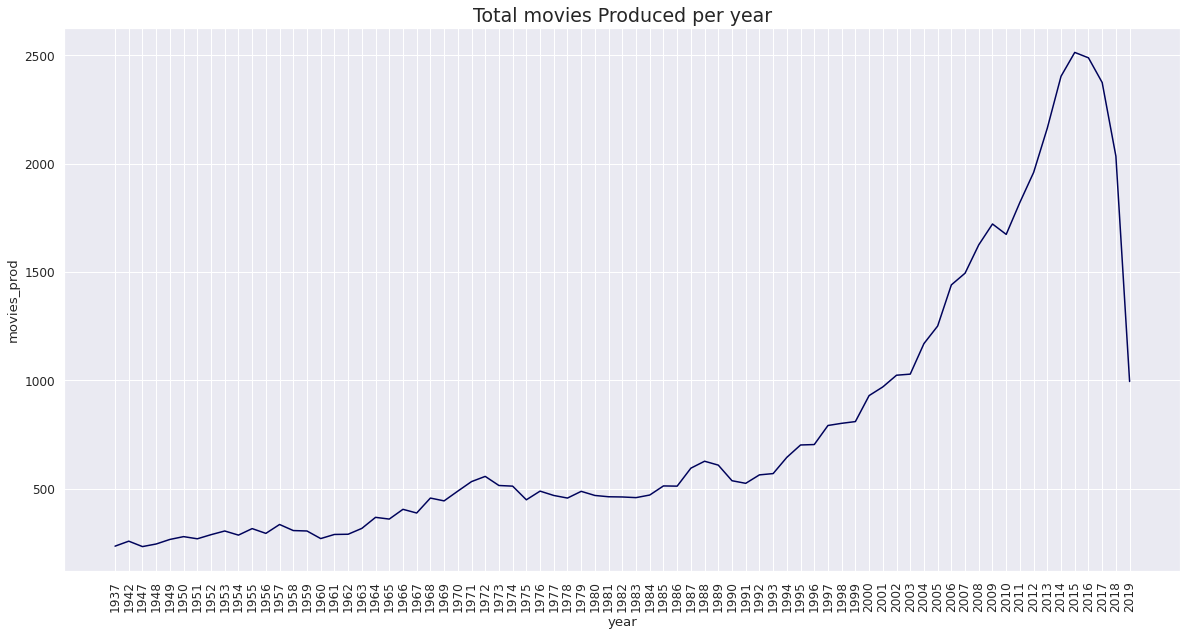

In [138]:
#Plotting total amount of movies released in each year using a count plot.
figure= plt.subplots(figsize=(20, 10))
axes=sns.lineplot(x="year",y= "movies_prod", data= Movies_prod, color= "#00035b" )
axes.set_title('Total movies Produced per year',fontsize=19)
plt.xticks(rotation=90)
plt.show()

from the visuals above it can be said that more movies were produce in the after 2000 compared to the before where just little amount of movies were produced. This might be as a result of technological advancement, Although 2019 seems to be a bit odd. We would need to ivestigate further to better understand why 2019 has a low turn out. 

In [139]:
# Exracting the year movies was created from the titles 
# Create a copy of the movie_ratings dataframe
movie_rated = movie_ratings.copy()
# Extract release year from movie titles
movie_rated['release_year']=movie_rated['title'].str[-5:-1] #extracting released year
movies_rated = movie_rated['release_year'].value_counts()[0:75].sort_index().to_frame().reset_index()
movies_rated= movies_rated.rename(columns= {'index': "year", 'release_year': "Number_of_rate"})

In [140]:
movie_rated[(movie_rated["release_year"]== '2020') | (movie_rated["release_year"]== '2021')]

,userId,movieId,rating,title,release_year


Due to the abscence of movies produced in 2020 and 2021 in the movie dataset , it can be concluded that movie set was collected in year 2019. Therefore this has affected the amount of movies available to work with .  

In [141]:
movie_rated['release_year'].value_counts()

1995    598371
1994    521621
1999    450380
1996    444231
2000    386359
         ...  
Chao         1
ort          1
skog         1
utto         1
 Lad         1
Name: release_year, Length: 406, dtype: int64

Now we need to understand how users rated movies per year

In [142]:
movies_rated

,year,Number_of_rate
0,1937,11120
1,1939,23356
2,1940,22906
3,1941,20919
4,1942,18916
...,...,...
70,2015,117610
71,2016,91991
72,2017,68112
73,2018,39278


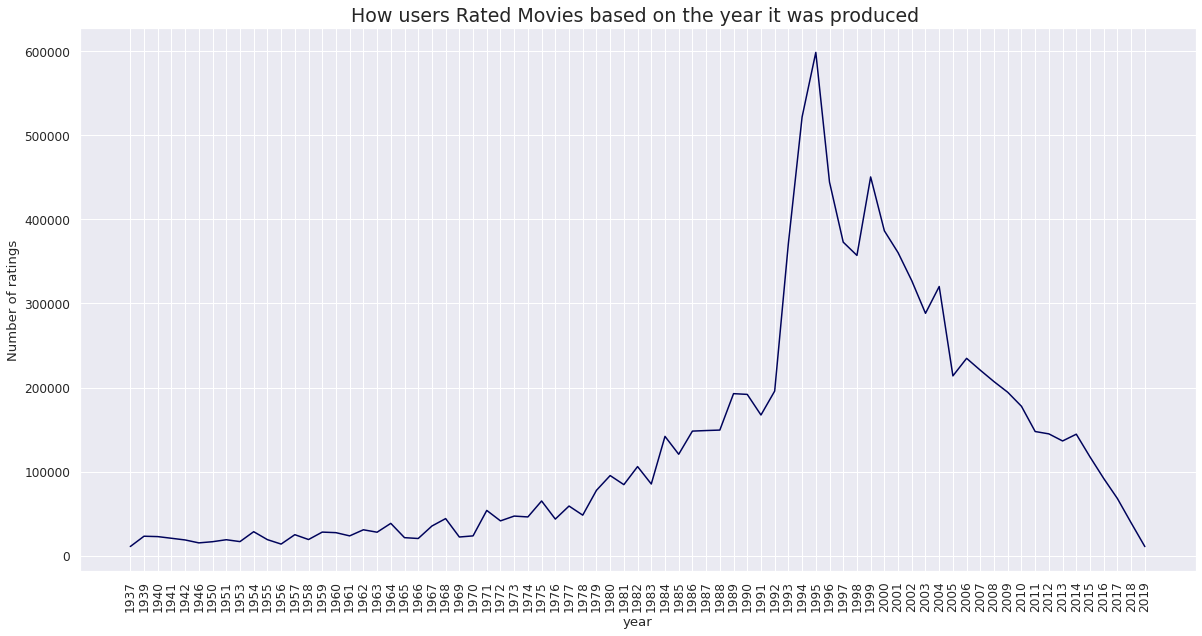

Total Number of Rate since 1900  10000038


In [143]:
#Plotting total amount of movies released in each year using a count plot.
figure= plt.subplots(figsize=(20, 10))
axes=sns.lineplot(x="year",y= "Number_of_rate", data= movies_rated,color= "#00035b"  )
axes.set_title('How users Rated Movies based on the year it was produced ',fontsize=19)
plt.xticks(rotation=90)
plt.ylabel("Number of ratings")
plt.show()
print( "Total Number of Rate since 1900 ", len(movie_ratings))

from the visuals above, year 1995 has the highest amount of feedbacks fro users. This might be as a result of production of more popular movies during that year. we would need to investigate that. 

In [144]:
movie_rated[(movie_rated["release_year"]== "1995") & (movie_rated["rating"]== 5)]

,userId,movieId,rating,title,release_year
119,158849,1,5.0,Toy Story (1995),1995
154,97203,1,5.0,Toy Story (1995),1995
219,144638,6,5.0,Heat (1995),1995
473,112595,333,5.0,Tommy Boy (1995),1995
651,76064,110,5.0,Braveheart (1995),1995
...,...,...,...,...,...
9999553,74812,207,5.0,"Walk in the Clouds, A (1995)",1995
9999736,72831,32,5.0,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),1995
9999792,124615,50,5.0,"Usual Suspects, The (1995)",1995
9999920,31349,47,5.0,Seven (a.k.a. Se7en) (1995),1995


After investigating and exploring the movie dataset, we confirmed that a lot of top rated popular movie was produced during this year compared to other years 

### How users rated movies per year 

Due to lack of availabilty of technology in the 1900 compared to how it is now , we hypothesied that no rating feedback on movies was given by users early 1900"s

In [145]:
#From movie data, convert timestamp to datetime
movies_ratings['time_dt'] = movies_ratings['timestamp'].apply(lambda x: datetime.fromtimestamp(x))

# # Extract year, month, day, day-of-week Respectively
movies_ratings['Year'] = movies_ratings['time_dt'].dt.year
movies_ratings['Month'] = movies_ratings['time_dt'].dt.month
movies_ratings['Day'] = movies_ratings['time_dt'].dt.day
movies_ratings['Day of Week'] = movies_ratings['time_dt'].dt.dayofweek

In [146]:
Per_year= movies_ratings.Year. value_counts().to_frame(name= "number_of_Rate").reset_index()
per_year= Per_year.rename(columns= {"index": "year"}).sort_values(by= "year")

In [147]:
per_year.head()

,year,number_of_Rate
24,1995,1
5,1996,571027
20,1997,250543
23,1998,108811
8,1999,424201


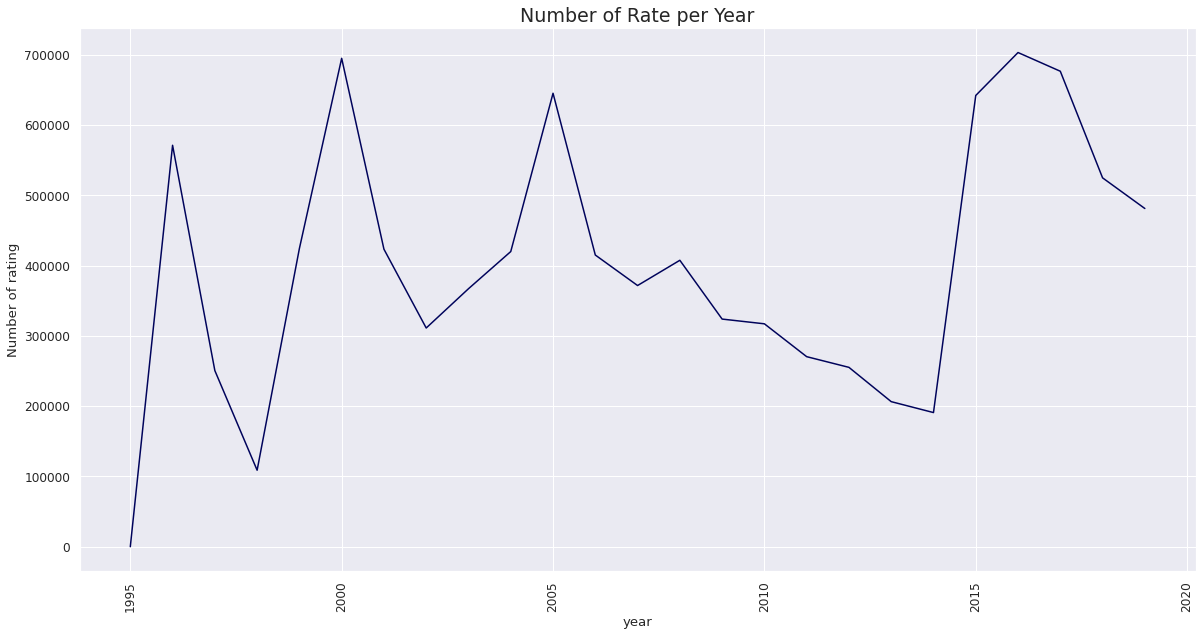

In [148]:
figure= plt.subplots(figsize=(20, 10))
axes=sns.lineplot(x="year",y= "number_of_Rate", data= per_year,color= "#00035b" )
axes.set_title('Number of Rate per Year',fontsize=19)
plt.ylabel("Number of rating")
plt.xticks(rotation=90)
plt.show()

From the visuals , it is clear that no rating feedback was giving to any movie before 1995 .However one rating was recorded in the year 1995. 2016 recorded the most rating feedbacks. The pattern of feedback might have been affected by the numbers of movies produced that year


### **Most Commonly Used Tags**

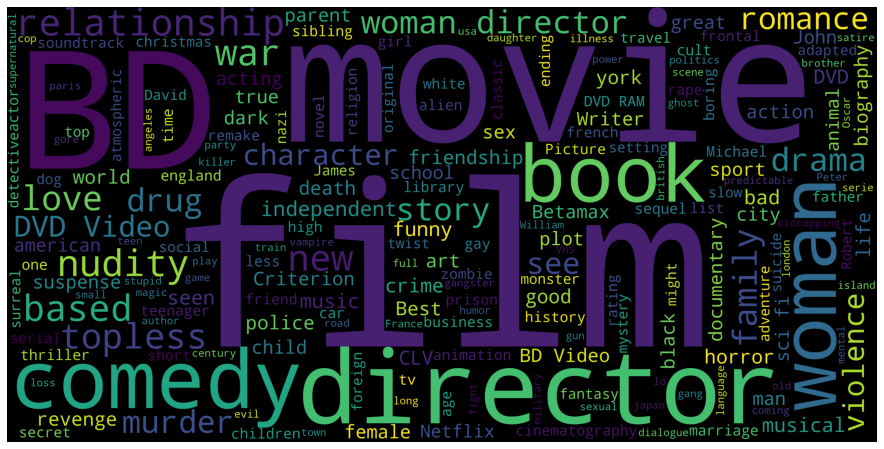

In [149]:
# Creating a wordcloud of the movie titles to view the most popular movie titles withtin the word cloud
movies_df['tags'] = movies_df['tags'].fillna("").astype('str')
tags_corpus = ' '.join(movies_df['tags'])
tags_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black', height=2000, width=4000, random_state= 42).generate(tags_corpus)

# Plotting the wordcloud
plt.figure(figsize=(16,8))
plt.imshow(tags_wordcloud)
plt.axis('off')
plt.show()

The wordcloud shows that people watched more tag many of the movies with words like nudity, murder, topless, family and woman.

After performing Exploratory data analysis of the data sets provided, we were able to find out that data set
- The total amount of distinct movies is 62423 with about 14210(23%) movies that were not rated at all by the users 
- There are 162541 uniques users who rated movies in the dataset  
- Average rating of 3.55 and a modal rating of 4.0
- UserId 72315 has the highest amount of rating (12592)
- Shawshank redemption is the highest rated movies
- 2015 recorded the highest amount of movies production
- The feature (movie rating) started in 1995 with just one rating. 
- Movies produced in 1995 has the highest cumulated rating 
- Top rated movie genres are drama and comedy 
- Most commonly used tags are nudity, topless, murder, comedy and drama
- Does not contain any movie created in 2020 , therefore this dataset was collect in 2019 

## **Some more Preprocessing**

### Implementation

We'll now implement a simple content-based filtering prediction system. First, we need to convert all the textual features in the movies_df properties column to numerics through vectorization. The vectorization function we will use is the TF-IDF vectorizer. It counts the frequency of words and their importance. 

In [150]:
# converting Final properties to numeral form so the computer can understand 
tf = TfidfVectorizer(analyzer='word', min_df=0, stop_words='english', max_features = 10000, ngram_range = (1,2))

# Produce a feature matrix, where each row corresponds to a book,
# with TF-IDF features as columns 
tfidf_matrix = tf.fit_transform(movies_df['properties'])
tfidf_matrix

<62423x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 1101889 stored elements in Compressed Sparse Row format>

We now have a sparse matrix with 62423 samples and 15000 features. We now convert the sparse matrix to a dataframe so we can add the budget and runtime columns. They were numeric and could not be passed to the vectorizer. 

In [151]:
sparse_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tf.get_feature_names())# creating a sparse form
sparse_df

,aaron,aaron james,aasif,abandoned,abandonment,abbas,abbie,abbott,abby,abduction,...,ziga,zimmer,zo,zoe,zombie,zombie horror,zombies,zone,zoo,zooey
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62418,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
62419,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
62420,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
62421,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<a id="four"></a>
# 4. Modeling and Prediction
<a href=#cont>Back to Table of Contents</a>

Next, we fitted the model and performed some prediction. The prediction will follow the following steps:

1. We select a given user from the userid and a given movie we need the rating by that user. 
2. Collect the similarity matrix for the reference movie from that user and all other movies that has been rated by that user. 
3. Sort the collected similarity matrix in descending order
4. Select the K-highest similarity values above a given threshhold, thereby creating a k collection. 
5. Compute the weighted average rating, R, for the k-collection. The weighted average is the sum of the similarity values for each movie multiplied by the given user rating, then divided by the sum of the similarity values. When we have the startup problem (the user has not rated any movie at all), then we take the mean of all the ratings given to that movie by the public. 
6. Return the weighted average, R.


In [152]:
def estimated_rating(userid, movieid, ratings_data, k=50, threshold = 0.0):
    # convert the movieid to a numeric index for our similarity matrix
    ref_movie_idx = indices[movieid]
    neighbors = [] # our collection of similarity values is stored here
    # Gather the similarity ratings between each movie the user has rated
    # and the reference book
    user_ratings = ratings_data[ratings_data['userId'] == userid][['movieId', 'rating']] # we get a user_ratings dataframe
    # get the index of each rated movie and do the similarity value with the reference movie. Make sure the indices are not the same
    for ind in user_ratings.index:
        user_movie_idx = indices[user_ratings['movieId'][ind]]
        # get the similarity score but check whether we have same index
        # get both vectors
        if ref_movie_idx != user_movie_idx:            
            ref_vector = sparse_df.iloc[ref_movie_idx].to_numpy()
            user_vector = sparse_df.iloc[user_movie_idx].to_numpy()
            sim_score = np.dot(ref_vector, user_vector)/(norm(ref_vector)*norm(user_vector))
            rating = user_ratings['rating'][ind]
            # store sim score and rating as a tuple in neighbors list 
            neighbors.append((sim_score, rating))
    # sort the 50 largest similarity scores
    k_neighbors = heapq.nlargest(k, neighbors, key=lambda t: t[0])
    
    # Compute the weighted average using similarity scores and 
    # user item ratings. 
    simTotal, weightedSum = 0, 0
    for (simScore, rating) in k_neighbors:
        # Ensure that similarity ratings are above a given threshold
        if (simScore > threshold):
            simTotal += simScore
            weightedSum += simScore * rating
    try:
        predictedRating = weightedSum / simTotal
    except ZeroDivisionError:
        # Cold-start problem - No ratings given by user. 
        # We use the average rating for the reference item as a proxy in this case 
        predictedRating = np.mean(ratings_data[ratings_data['movieId']==movieid]['rating'])
    return predictedRating
    
    
    

With our algorithm defined, let's test it out to see some of the results. 

Let's generate a rating for userid = 5163 and movie id = 57669. 

In [153]:
title = "In Brugges (2008)"
actual_rating = movie_ratings[(movie_ratings['userId'] == 5163) & (movie_ratings['movieId'] == 57669)]['rating'].values[0]
pred_rating = estimated_rating(userid=5163, movieid=57669, ratings_data=movie_ratings)
print (f"Title - {title}")
print ("---")
print (f"Actual rating: \t\t {actual_rating}")
print (f"Predicted rating: \t {pred_rating}")

Title - In Brugges (2008)
---
Actual rating: 		 4.0
Predicted rating: 	 4.261142922876671


In [154]:
title = "Father of the Bride Part II (1995)"
actual_rating = movie_ratings[(movie_ratings['userId'] == 106343) & (movie_ratings['movieId'] == 5)]['rating'].values[0]
pred_rating = estimated_rating(userid=106343, movieid=5, ratings_data=movie_ratings)
print (f"Title - {title}")
print ("---")
print (f"Actual rating: \t\t {actual_rating}")
print (f"Predicted rating: \t {pred_rating}")

Title - Father of the Bride Part II (1995)
---
Actual rating: 		 4.5
Predicted rating: 	 3.7154449392166837


This shows us that our algorithm for predicting movie ratings is quite moderately good. We noted that the average rating is about 3.5 across all the movies with a mode of 4.0. So we can say that our rating algorithm is somewhat good overall. 

## **Collaborative Filtering**

The Collaborative filtering method for recommender systems is a method that is solely based on the past interactions that have been recorded between users and items, in order to produce new recommendations.

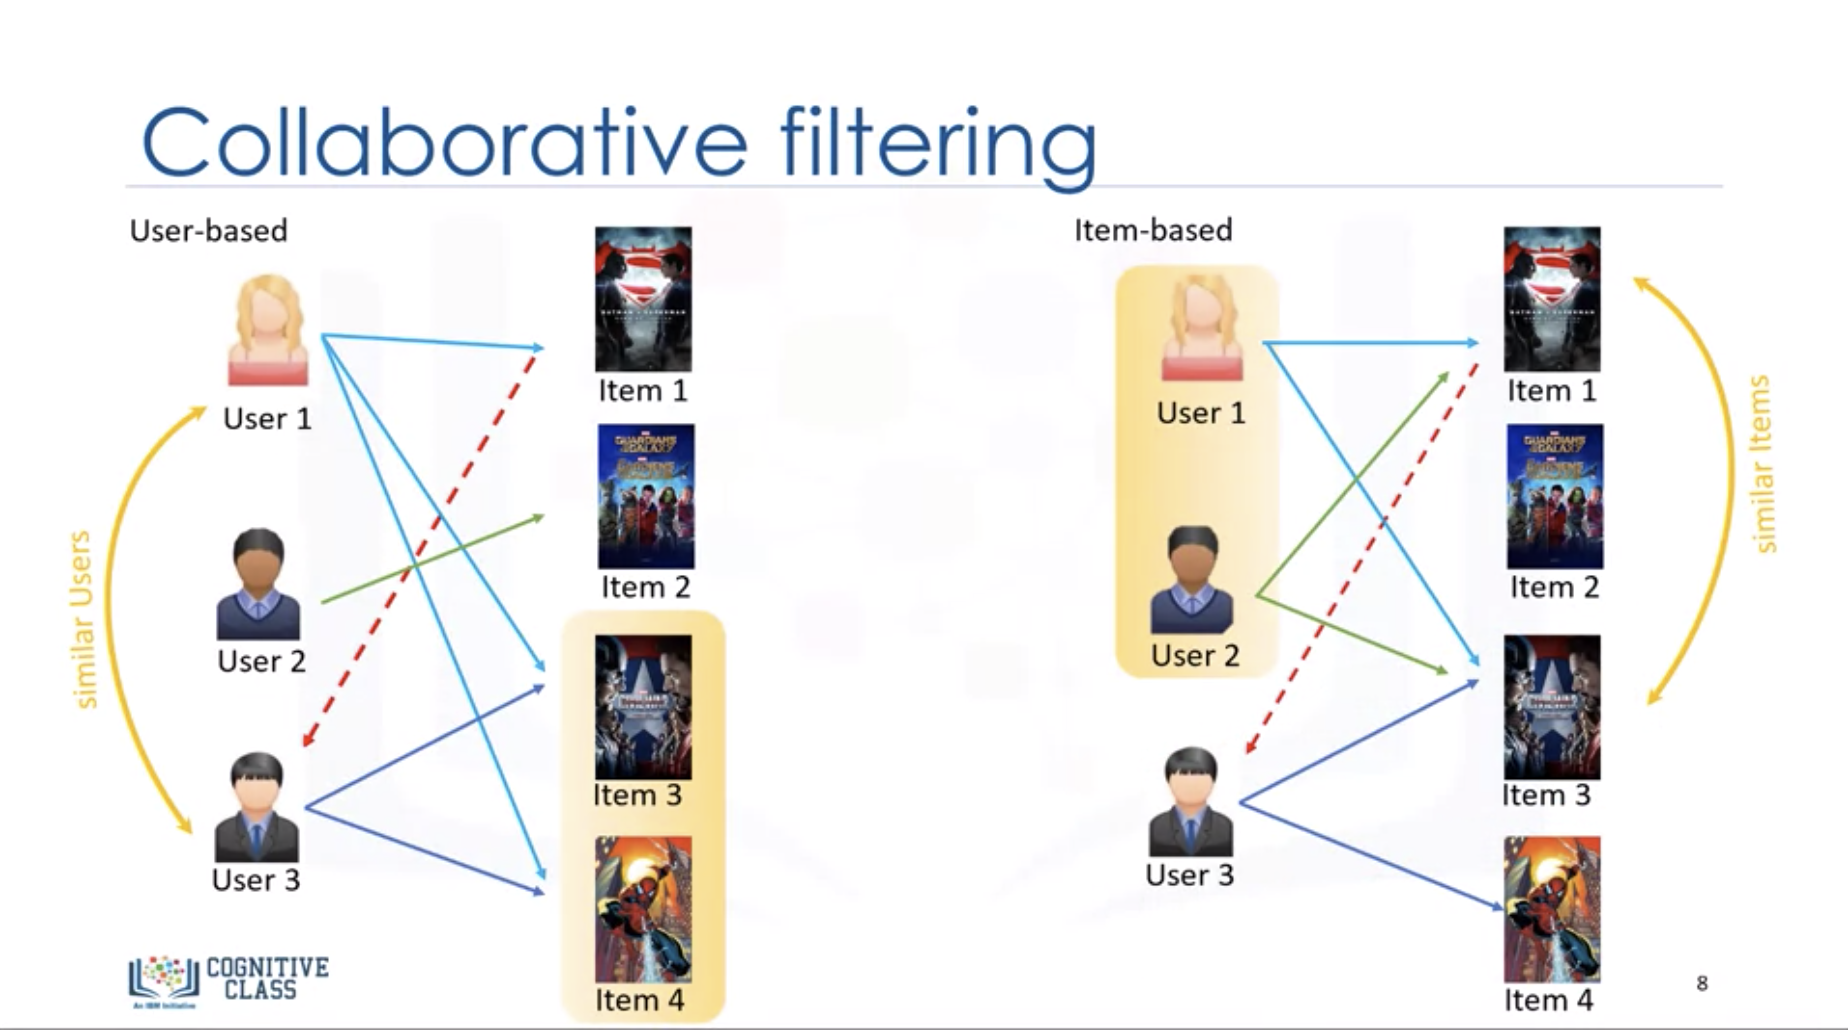

Three types of collaborative filtering commonly used in recommendation systems are 
- neighbor-based, 
- item-to-item and 
- classification- based.

In **neighbor-based filtering**, users are selected for their similarity to the active user. This similarity is determined by matching users who have posted similar reviews. Based on the previous similarity, it is presumed that future likes and dislikes will also be similar. From the average rating of the group, recommendations are made for the active user.

An **item-to-item filtering** process uses a matrix to determine the likeness of pairs of items. Item-to-item processes then compare the current user’s preference to the items in the matrix for similarities upon which to base recommendations.

 A **classification-based** collaborative filtering system recommends things based on how similar users liked that classification or genre. It is assumed that users that enjoy or dislike similar experiences within a classification will also enjoy others within that classification.

Some collaborative filtering systems are memory-based, like neighboring- and item-to-item models, which compare similarities of users or items. Others are model-based, using machine learning to compare dissimilar items. Model-based systems may use algorithms such as the Markov decision process to predict ratings for items that have not yet been reviewed. Hybrid systems include features of both memory-based and model-based filtering

Due to the size and complexity required to train collaborative filtering model on the full data set. We decided to cross-validate on randow samples of the data sets in order to understand how the models would perform. 

In [155]:
print('Shape of our Actual TRAIN Dataset', movie_ratings.shape) # shape of the original data set 
movie_ratings_small = movie_ratings.sample(frac=0.002, random_state=68) # selecting  randomly selected 2% of the data set.
print('0.2 % of our TRAIN Dataset', movie_ratings_small.shape)# size of our sample

Shape of our Actual TRAIN Dataset (10000038, 4)
0.2 % of our TRAIN Dataset (20000, 4)


We would be training Our data sets on 20000 samples 

## Cross-Validation

Cross validation was performed around a small sample of the data saet using various models

In [156]:
reader = Reader(rating_scale = (0.5,5))
data = Dataset.load_from_df(movie_ratings_small[["userId", "movieId", "rating"]], reader)
result= []
# Iterate over all algorithms

models = [SVD(), SVDpp(), SlopeOne(), NMF(), NormalPredictor(), KNNBaseline(), 
          KNNBasic(), KNNWithMeans(), KNNWithZScore(), BaselineOnly(), CoClustering()]


for model in models:
    print('loading', str(model))
    # Perform cross validation
    results = cross_validate(model, data, measures=['RMSE'], cv=3, verbose=False)
    print("finishing up", str(model))
    # results = cross_validate(algorithm, data, measures=['RMSE','MAE'], cv=3, verbose=False)
    
    # Get results & append algorithm name
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(model).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    result.append(tmp)
    print("Done: " ,str(model), "\n\n")

print ('\n\tDONE\n')

In [157]:
results= pd.DataFrame(result).set_index("Algorithm").sort_values(by = "test_rmse")
results

From the dataframe , it can be seen that SVDpp produced the best result but due to high computational time required well dealing with large amount of data. Thus the second and third best models (SVD,BaselineOnly) were chosen.

## Hyperparameter tuning 

Some hyper-parameter tuning was carried out to determine the value of some hyperparameters that optimized the model.

### SVD 

In [158]:
#uncomment to perform gridsearch , This would take place for one hour plus
param_grid = {'n_epochs': [10, 50 , 60,75, 100], 'lr_all': [0.002, 0.005, 0.01,0.02, 0.04],
              'reg_all': [0.005, 0.02,0.04,0.1,0.2, 0.4, 0.6], "n_factors": [50,100,150]}
gs1 = GridSearchCV(SVD, param_grid, measures=["rmse", "mae"], cv=3)

In [159]:
gs1.fit(data)

In [160]:
best_svd= gs1.best_params

In [161]:
gs1.best_score

In [162]:
gs1.predict(testset)

### BaselineOnly

Baselines can be estimated in two different ways:
- Using Stochastic Gradient Descent (SGD).
- Using Alternating Least Squares (ALS)

You can configure the way baselines are computed using the bsl_options parameter passed at the creation of an algorithm. This parameter is a dictionary for which the key 'method' indicates the method to use. Accepted values are 'als' (default) and 'sgd'. Depending on its value, other options may be set.

In [163]:
bsl_options_als = {'method': 'als',
               'n_epochs': [5, 20,40,70,80],
               'reg_u': [12,30,50],
               'reg_i': [5,10,30,50]
               }

In [164]:
bsl_options_sgd= {"method": "sgd"
    "learning_rate": [0.001, 0.002,0.005, 0.006],
   "reg": [0.02, 0.04, 0.06],
   'n_epochs': [20,30,50,75,80]}

In [165]:
gs2 = GridSearchCV(KNNBaseline(), bsl_options_als, measures="rmse", cv=3)
als= gs2.fit(data)
gs2.best_score

In [166]:
gs2.best_params

In [167]:
gs3= GridSearchCV(KNNBaseline(), bsl_options_sgd, measures="rmse", cv=3)
sgd= gs3.fit(data)
gs3.best_score

In [168]:
gs3.best_params

After Optimization, We achieved best result with svd model with parameter {'lr_all': 0.006, 'n_epochs': 75, 'n_factors': 300, 'reg_all': 0.04, "init_std_dev": 0.04} through Gridsearch, Which was able to  produce a better rmse of 1.009

Lets test the best svd on the full data set and see how it performs 

## Optimised Svd on Full Data Set

After getting the best hyper-parameters, the data was trained again using the optimized model.

In [169]:
#Loading in full movie_df for Modeling
reader = Reader(rating_scale = (0.5,5))
data1 = Dataset.load_from_df(movie_ratings[["userId", "movieId", "rating"]], reader)
trainset, testset = train_test_split(data1, test_size=0.25)

In [170]:
best_svd= SVD(lr_all= 0.006, n_epochs= 75, n_factors= 300, reg_all= 0.04, init_std_dev= 0.04)

In [171]:
best_svd.fit(trainset)
b_pred=best_svd.test(testset)

In [172]:
RMSE= accuracy.rmse(b_pred)
print("Rmse ", RMSE)
# RMSE= 0.809

WE achieved an RMSE of 0.809 .

<a id="five"></a>
# 5.  Kaggle submission
<a href=#cont>Back to Table of Contents</a>


Here, we generated the prediction file for submission on kaggle in a csv format.

In [173]:
test["rating"] = test.apply(
    lambda x: best_svd.predict(x["userId"], x["movieId"]).est, axis=1
)
test["Id"] = test.apply(lambda x: f"{x['userId']:.0f}_{x['movieId']:.0f}", axis=1)
submission = test[["Id", "rating"]]

In [174]:
submission.to_csv("Third.csv", index=False)

<a id="six"></a>
# 6. Pickling The Model
<a href=#cont>Back to Table of Contents</a>

In [175]:
model_save_path = "mlr_model.pkl"
with open(model_save_path,'wb') as file:
    pickle.dump(best_svd,file)

<a id="seven"></a>
# 7. Model Explaination
<a href=#cont>Back to Table of Contents</a>

Compared to the other Baseline model , SVD model was able to produce the best result(rmse) with the least computational time . Svd model operates by decreasing the dimension of the data set and extracting its latent factors and mapping each user and each item into a r-dimensional latent space in order to let the model generalise well and not overfit the training data. This reduces the error between the value predicted by the model and the actual value. Thus producing the best result.

<a id="eight"></a>
# 8. Conclusion 
<a href=#cont>Back to Table of Contents</a>

Finding and recommending many suitable items that would be liked and selected by users is always a challenge in this modern technology days. Recommender system provides a way for movie industries to be able to accurately predict what type of movie a user would like and how such movie would be rated. With the development of recommender systems , many company have been able to achieve huge success with attracting and retaining users in the movie industry. 

<a id="nine"></a>
# 9. Logging Notebook and parameters into comets for future referencing
<a href=#cont>Back to Table of Contents</a>

In [183]:
# Create an experiment with your api key
experiment = Experiment(
    api_key="QhbV5Xil65qBuiAZELjDI9FbR",
    project_name="edsa-movie-recommendation-system",
    workspace="ashafa1905",
)

COMET WARNING: Comet has disabled auto-logging functionality as it has been imported after the following ML modules: sklearn. Metrics and hyperparameters can still be logged using comet_ml.log_metrics() and comet_ml.log_parameters()
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET ERROR: Failed to calculate active processors count. Fall back to default CPU count 1
COMET INFO: Couldn't find a Git repository in '/content' nor in any parent directory. You can override where Comet is looking for a Git Patch by setting the configuration `COMET_GIT_DIRECTORY`
COMET INFO: Experiment is live on comet.ml https://www.comet.com/ashafa1905/edsa-movie-recommendation-system/dbd22eb5fafc414997250ce4498b5e72



In [184]:
# Generates two dictionaries, parameters and metric values
params = {
    'random_state': Random_state,
    'model_type': 'SVD',
'lr_all': 0.006, 'n_epochs': 75,
 "n_factors": 300, "reg_all": 0.04, "init_std_dev":  0.04}

metrics ={
    'Rmse': RMSE}
metrics

{'Rmse': 0.809}

In [185]:
experiment.log_parameters(params)
experiment.log_metrics(metrics)
experiment.end()

COMET WARNING: Couldn't retrieve Google Colab notebook content
COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/ashafa1905/edsa-movie-recommendation-system/dbd22eb5fafc414997250ce4498b5e72
COMET INFO:   Metrics:
COMET INFO:     Rmse : 0.809
COMET INFO:   Others:
COMET INFO:     notebook_url : https://colab.research.google.com/notebook#fileId=1leK1kPkI0Gsjtjh17Hoy3XxrGX60KXSs
COMET INFO:   Parameters:
COMET INFO:     init_std_dev : 0.04
COMET INFO:     lr_all       : 0.006
COMET INFO:     model_type   : SVD
COMET INFO:     n_epochs     : 75
COMET INFO:     n_factors    : 300
COMET INFO:     random_state : 42
COMET INFO:     reg_all      : 0.04
COMET INFO:   Uploads:
COMET INFO:     environment details : 1
COMET INFO:     filename            : 1
COMET INFO:     installed packages  : 1
COMET INFO:

<a id="ten"></a>
# 10. References
<a href=#cont>Back to Table of Contents</a>

[Type of Reccommender systems ](https://www.bluepiit.com/blog/classifying-recommender-systems/#:~:text=%20Classifying%20Different%20Types%20of%20Recommender%20Systems%20,system%20aims%20to%20categorize%20the%20users...%20More%*20*)


[Understanding Movie Recomendation system ](https://www.bing.com/ck/a?!&&p=df40321e922e0ec8JmltdHM9MTY1ODMxMjg3NyZpZ3VpZD1iM2YyZTg3Zi0xYjc5LTQyNTQtODI3Ni1mNzAzOTAyYmIyNzAmaW5zaWQ9NTA5OA&ptn=3&hsh=3&fclid=9f241a16-0816-11ed-9192-5d3922647878&u=a1L3ZpZGVvcy9zZWFyY2g_cT1ob3crdG8rcGVyZm9ybStjb2xsYWJvcmF0aXZlK3JlY2NvbWVuZGVyK3N5c3RlbSZxcHZ0PWhvdyt0bytwZXJmb3JtK2NvbGxhYm9yYXRpdmUrcmVjY29tZW5kZXIrc3lzdGVtJkZPUk09VkRSRQ&ntb=1)